## Imports

In [ ]:
from datetime import datetime
import numpy as np
import pickle
import json
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd gdrive/MyDrive/SPARSe

/content/gdrive/.shortcut-targets-by-id/1hNRRb9O7Y1kI_ulnKgi3KeD8eRwFsiwr/SPARSe


In [100]:
data = pd.read_csv("features_labels/Model_Features_v1.csv")
labels = pd.read_csv("features_labels/Model_Labels_Binary_v0.csv")

In [101]:
data = data.merge(labels, on="projectid")
data.drop(["Unnamed: 0_y", "Unnamed: 0_x"], axis = 1, inplace = True)

In [102]:
data

,projectid,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_teach_for_america,teacher_ny_teaching_fellow,total_price_excluding_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,school_state_AK,school_state_AL,school_state_AR,school_state_AZ,school_state_CA,school_state_CO,school_state_CT,school_state_DC,school_state_DE,school_state_FL,school_state_GA,school_state_HI,school_state_IA,school_state_ID,school_state_IL,school_state_IN,school_state_KS,school_state_KY,school_state_LA,school_state_MA,school_state_MD,school_state_ME,school_state_MI,school_state_MN,school_state_MO,school_state_MS,school_state_MT,school_state_NC,school_state_ND,school_state_NE,school_state_NH,school_state_NJ,school_state_NM,school_state_NV,school_state_NY,school_state_OH,school_state_OK,school_state_OR,school_state_PA,school_state_RI,school_state_SC,school_state_SD,school_state_TN,school_state_TX,school_state_UT,school_state_VA,school_state_VT,school_state_WA,school_state_WI,school_state_WV,school_state_WY,school_metro_missing,school_metro_rural,school_metro_suburban,school_metro_urban,teacher_prefix_Dr.,teacher_prefix_Mr.,teacher_prefix_Mr. & Mrs.,teacher_prefix_Mrs.,teacher_prefix_Ms.,teacher_prefix_missing,primary_focus_area_Applied Learning,primary_focus_area_Health & Sports,primary_focus_area_History & Civics,primary_focus_area_Literacy & Language,primary_focus_area_Math & Science,primary_focus_area_Music & The Arts,primary_focus_area_Special Needs,primary_focus_area_missing,secondary_focus_area_Applied Learning,secondary_focus_area_Health & Sports,secondary_focus_area_History & Civics,secondary_focus_area_Literacy & Language,secondary_focus_area_Math & Science,secondary_focus_area_Music & The Arts,secondary_focus_area_Special Needs,secondary_focus_area_missing,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,resource_type_missing,poverty_level_high poverty,poverty_level_highest poverty,poverty_level_low poverty,poverty_level_moderate poverty,grade_level_Grades 3-5,grade_level_Grades 6-8,grade_level_Grades 9-12,grade_level_Grades PreK-2,grade_level_missing,total_number_of_donations,total_value_of_donations,num_promo_matched,prop_of_donations_from_same_city,prop_of_donations_from_same_state,prop_of_teacher_donors,prop_via_giving_page,avg_value_per_donation,total_prop_funded,prop_promo_matched,num_words_in_title,num_words_in_short_description,num_words_in_essay,is_fully_funded
0,316ed8fb3b81402ff6ac8f721bb31192,0,0,0,0,0,0,0,0,555.81,32.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3,39,396,0
1,90de744e368a7e4883223ca49318ae30,0,0,0,0,0,0,0,0,296.47,22.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,7,36,218,0
2,32943bb1063267de6ed19fc0ceb4b9a7,0,0,0,0,0,0,0,0,430.89,17.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,7,42,237,0
3,bb18f409abda2f264d5acda8cab577a9,0,1,0,0,0,0,1,0,576.07,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,7,32,285,0
4,24761b686e18e5eace634607acbcc19f,0,0,0,0,0,0,0,0,408.40,24.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0

In [103]:
train_test_val_project_ids = json.load(open('trainvalsplit50.json', 'r'))

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [105]:
# #Logistic Regression
# cs = [0.1, 0.2, 0.5, 1, 2, 5]
# for i in range(len(cs)):
#   train_ids = train_test_val_project_ids[f"train{30}"]
#   valid_ids = train_test_val_project_ids[f"valid{30}"]
#   train_data = data[data.projectid.isin(train_ids)]
#   val_data = data[data.projectid.isin(valid_ids)]
#   train_labels = train_data["is_fully_funded"].to_numpy()
#   train_features = train_data.drop(["is_fully_funded", "projectid"], axis = 1).to_numpy()

#   test_labels = val_data["is_fully_funded"].to_numpy()
#   test_features = val_data.drop(["is_fully_funded", "projectid"], axis = 1).to_numpy()
#   classifier = LogisticRegression(solver='lbfgs', C = cs[i], max_iter=10000)
#   classifier = classifier.fit(train_features, train_labels)
#   results = np.concatenate([classifier.predict_proba(test_features), test_labels[:, np.newaxis]], axis = 1)
#   results = results[results[:, 1].argsort()]
#   print((np.mean((results[:results.shape[0]//10, 1] > 0.5) == (results[:results.shape[0]//10, 2] > 0.5))))

KeyboardInterrupt: ignored

In [106]:
baseline_accs = []
logistic_regression_accs = []
decision_tree_accs = []
time = []
for i in range(50):
  print(i)
  train_ids = train_test_val_project_ids[f"train{i+1}"]
  valid_ids = train_test_val_project_ids[f"valid{i+1}"]
  time.append(train_test_val_project_ids[f"train_end{i+1}"])
  train_data = data[data.projectid.isin(train_ids)]
  val_data = data[data.projectid.isin(valid_ids)]
  train_labels = train_data["is_fully_funded"].to_numpy()
  train_features = train_data.drop(["is_fully_funded", "projectid"], axis = 1).to_numpy()
  
  test_labels = val_data["is_fully_funded"].to_numpy()
  test_features = val_data.drop(["is_fully_funded", "projectid"], axis = 1).to_numpy()
  #Baseline Accs
  results = val_data[["total_prop_funded", "total_prop_funded", "is_fully_funded"]].to_numpy()
  results = results[results[:, 1].argsort()]
  baseline_accs.append(1-np.mean(results[:results.shape[0]//10, 2]))
  #Logistic Regression
  classifier = LogisticRegression(solver='lbfgs', max_iter=10000)
  classifier = classifier.fit(train_features, train_labels)
  results = np.concatenate([classifier.predict_proba(test_features), test_labels[:, np.newaxis]], axis = 1)
  results = results[results[:, 1].argsort()]
  logistic_regression_accs.append((np.mean((results[:results.shape[0]//10, 1] > 0.5) == (results[:results.shape[0]//10, 2] > 0.5))))
  #Decision Tree
  classifier = DecisionTreeClassifier(max_depth=5)
  classifier = classifier.fit(train_features, train_labels)
  results = np.concatenate([classifier.predict_proba(test_features), test_labels[:, np.newaxis]], axis = 1)
  results = results[results[:, 1].argsort()]
  decision_tree_accs.append((np.mean((results[:results.shape[0]//10, 1] > 0.5) == (results[:results.shape[0]//10, 2] > 0.5))))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [107]:
baseline_baseline_accs = []
for i in range(50):
  valid_ids = train_test_val_project_ids[f"valid{i+1}"]
  val_data = data[data.projectid.isin(valid_ids)]
  baseline_baseline_accs.append(1-np.mean(val_data[["is_fully_funded"]].to_numpy()))

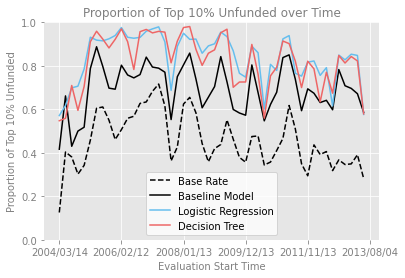

In [108]:
import matplotlib.pyplot as plt
ax = plt.axes(facecolor = "#E6E6E6")
plt.grid(color = "w", linestyle = "solid")
for spine in ax.spines.values():
  spine.set_visible(False)
ax.tick_params(colors = "gray", direction = "out")
ax.set_xticks(np.arange(0, 51, 10))
ax.set_xticklabels(time[::10] + [time[-1]])
ax.set_xlabel("Evaluation Start Time", color = "gray")
ax.set_ylabel("Proportion of Top 10% Unfunded", color = "gray")
ax.set_title("Proportion of Top 10% Unfunded over Time", color = "gray")
ax.plot([i for i in range(50)], baseline_baseline_accs, "--", color = "#000000", label = "Base Rate")
ax.plot([i for i in range(50)], baseline_accs, color = "#000000", label = "Baseline Model")
ax.plot([i for i in range(50)], logistic_regression_accs, color = "#66BEEE", label = "Logistic Regression")
ax.plot([i for i in range(50)], decision_tree_accs, color = "#EE6666", label = "Decision Tree")
ax.legend()
ax.set_ylim([0, 1])
plt.show()